In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [47]:
new_data = pd.read_csv("leukemia.csv")
print(new_data.shape)

(74, 5148)


## 1. Mutual Info[F1] 
## 2. F Classif[F2] 
## 3.T-Test[F3]

## (c) 1. F1( N features ) → F2( 2N/3 features out of selected features from F1) →    
##           F3(N/3 features out of selected features from F2)

# Preprocessing

In [48]:
df = new_data.iloc[2:,:] # Removes first two tubles
print(df["gene"].unique())
df.gene[df.gene == 'ALL'] = 0
df.gene[df.gene == 'AML'] = 1
print('Updated value of gene : '+str(df["gene"].unique()))


['ALL' 'AML']
Updated value of gene : [0 1]


In [49]:
print('Required data set ')
df.head()

Required data set 


,gene,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,0,88,15091,311,21,-13,215,797,14538,9738,...,384,1582,185,511,389,793,329,36,191,-37
3,0,283,11038,134,-21,-219,116,433,615,115,...,231,624,169,837,442,782,295,11,76,-14
4,0,309,16692,378,67,104,476,1474,5669,3272,...,720,753,315,1199,168,1138,777,41,228,-41
5,0,12,15763,268,43,-148,155,415,4850,2293,...,307,743,240,835,174,627,170,-50,126,-91
6,0,168,18128,118,-8,-55,122,483,1284,2731,...,178,626,156,649,504,250,314,14,56,-25


In [50]:
df.isnull().sum()

gene              0
AFFX-BioC-5_at    0
hum_alu_at        0
AFFX-DapX-M_at    0
AFFX-LysX-5_at    0
                 ..
X83863_at         0
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
Length: 5148, dtype: int64

In [51]:
feature_set = df.drop('gene', 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['AFFX-BioC-5_at', 'hum_alu_at', 'AFFX-DapX-M_at', 'AFFX-LysX-5_at', 'AFFX-HUMISGF3A/M97935_MA_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMISGF3A/M97935_3_at', 'AFFX-HUMRGE/M10098_5_at', 'AFFX-HUMRGE/M10098_M_at', 'AFFX-HUMRGE/M10098_3_at', 'AFFX-HUMGAPDH/M33197_5_at', 'AFFX-HUMGAPDH/M33197_M_at', 'AFFX-HUMGAPDH/M33197_3_at', 'AFFX-HSAC07/X00351_5_at', 'AFFX-HSAC07/X00351_M_at', 'AFFX-HSAC07/X00351_3_at', 'AFFX-HUMTFRR/M11507_5_at', 'AFFX-HUMTFRR/M11507_M_at', 'AFFX-HUMTFRR/M11507_3_at', 'AFFX-M27830_5_at', 'AFFX-M27830_M_at', 'AFFX-HSAC07/X00351_3_st', 'AFFX-HUMGAPDH/M33197_M_st', 'AFFX-HUMGAPDH/M33197_3_st', 'AFFX-HSAC07/X00351_M_st', 'A28102_at', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002365_at', 'AB002380_at', 'AB002559_at', 'AB003102_at', 'AB003103_

In [52]:
feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,88,15091,311,21,-13,215,797,14538,9738,8529,...,384,1582,185,511,389,793,329,36,191,-37
3,283,11038,134,-21,-219,116,433,615,115,1518,...,231,624,169,837,442,782,295,11,76,-14
4,309,16692,378,67,104,476,1474,5669,3272,3668,...,720,753,315,1199,168,1138,777,41,228,-41
5,12,15763,268,43,-148,155,415,4850,2293,2569,...,307,743,240,835,174,627,170,-50,126,-91
6,168,18128,118,-8,-55,122,483,1284,2731,316,...,178,626,156,649,504,250,314,14,56,-25


In [53]:
target_feature = df['gene']
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: gene, dtype: object

In [54]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


# Training and Spilting of Data

In [55]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((57, 5147), (15, 5147))

In [56]:
y_train.shape, y_test.shape

((57,), (15,))

In [57]:
columns = feature_set.shape[1]

number_of_features_required_1 = 2*(columns/3)
number_of_features_required_2 = columns/3
number_of_features_required_3 = 0.19*columns

print('number_of_features_required_1 : '+str(number_of_features_required_1))
print('number_of_features_required_2 : '+str(number_of_features_required_2))
print('number_of_features_required_3 : '+str(number_of_features_required_3))

number_of_features_required_1 = int(number_of_features_required_1)
number_of_features_required_2 = int(number_of_features_required_2)
number_of_features_required_3 = int(number_of_features_required_3)

print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))
print('number_of_features_required_2 in integers: '+str(number_of_features_required_2))
print('number_of_features_required_3 in integers: '+str(number_of_features_required_3))

number_of_features_required_1 : 3431.3333333333335
number_of_features_required_2 : 1715.6666666666667
number_of_features_required_3 : 977.9300000000001
number_of_features_required_1 in integers: 3431
number_of_features_required_2 in integers: 1715
number_of_features_required_3 in integers: 977


# Selection of features using Mutual Information 

In [58]:
from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
  #Combining the data values
  combo_d= np.vstack((x,y)).T
  #Number of data points
  n=len(x)
  n_x=[]
  unique_y=len(set(y))
  #Defining Empty list for every class
  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=item[1]
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    #Calculating distance of a point with all other points in the same class
    for pt_c in n_x[pt[1]]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
    #Considering k=3 for the kth nearest neighbour of point in the class the point belongs to
    k=3
    kth_dist_c=distx[k-1]
    dist=[]
    #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))
    #Calculating the number of points in the dataset at distance = kth distance_class from the point
    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1
    #Total points in class the point belongs to
    n_x_i=len(n_x[pt[1]])
    #Calculating I_i for every point
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx=indx + 1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)

In [59]:
X_train_tp=X_train.values.transpose()
mi_start_time = time.time()
#Total feature in training set 
total_features=len(feature_name)
#Defining array to list of mutual information of every pair of feature and target feature
mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Gene and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Gene and Feature_AFFX-BioC-5_at :  0.021441478646131672
Mutual Information between Gene and Feature_hum_alu_at :  0.06274365161483543
Mutual Information between Gene and Feature_AFFX-DapX-M_at :  0.12882872080119015
Mutual Information between Gene and Feature_AFFX-LysX-5_at :  0.08529769577880128
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MA_at :  0.019322971328844606
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MB_at :  0.11272325477312349
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_3_at :  0.013917988973383413
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_5_at :  0.014192886505913119
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_M_at :  0.01904898628704328
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_3_at :  0.02141640444393509
Mutual Information between Gene and Feature_AFFX-HUMGAPDH/M33197_5_at :  0.04738958746577195
Mutual Information bet

Mutual Information between Gene and Feature_D10522_at :  0.029611365356021685
Mutual Information between Gene and Feature_D10523_at :  0.05748134394012581
Mutual Information between Gene and Feature_D10656_at :  0.01235320571886395
Mutual Information between Gene and Feature_D10923_at :  0.05401490663060881
Mutual Information between Gene and Feature_D10995_at :  0.005232661766664507
Mutual Information between Gene and Feature_D11086_at :  0.02749788889229259
Mutual Information between Gene and Feature_D11094_at :  0.030495782579055247
Mutual Information between Gene and Feature_D11139_at :  0.015946045088814326
Mutual Information between Gene and Feature_D11151_at :  0.10858499175429998
Mutual Information between Gene and Feature_D11428_at :  0.0552436242671772
Mutual Information between Gene and Feature_D12485_at :  0.04178172059833202
Mutual Information between Gene and Feature_D12625_at :  0.06596012511525698
Mutual Information between Gene and Feature_D13118_at :  0.01888821554334

Mutual Information between Gene and Feature_D26308_at :  0.1405294962007027
Mutual Information between Gene and Feature_D26361_at :  0.008938576581961863
Mutual Information between Gene and Feature_D26362_at :  0.027521751338755628
Mutual Information between Gene and Feature_D26443_at :  0.00018436398032700794
Mutual Information between Gene and Feature_D26528_at :  0.08645967916744267
Mutual Information between Gene and Feature_D26561_cds1_at :  0.04735911466154979
Mutual Information between Gene and Feature_D26561_cds2_at :  0.06164053757300366
Mutual Information between Gene and Feature_D26561_cds3_at :  0.12614307512018846
Mutual Information between Gene and Feature_D26579_at :  0.08160360798715453
Mutual Information between Gene and Feature_D26598_at :  0.015175993095164611
Mutual Information between Gene and Feature_D26599_at :  0.02822405514234491
Mutual Information between Gene and Feature_D26600_at :  0.05505706432298506
Mutual Information between Gene and Feature_D28114_at : 

Mutual Information between Gene and Feature_D49950_at :  0.15881154216700177
Mutual Information between Gene and Feature_D49958_at :  0.12566569370342295
Mutual Information between Gene and Feature_D50063_at :  0.1521172974271711
Mutual Information between Gene and Feature_D50310_at :  0.03181797397863155
Mutual Information between Gene and Feature_D50370_at :  0.02139177742241851
Mutual Information between Gene and Feature_D50402_at :  0.02562141029239368
Mutual Information between Gene and Feature_D50487_at :  0.03063784505613485
Mutual Information between Gene and Feature_D50525_at :  0.08496960104666726
Mutual Information between Gene and Feature_D50532_at :  0.022381359825965386
Mutual Information between Gene and Feature_D50640_at :  0.04402531041728437
Mutual Information between Gene and Feature_D50645_at :  0.012065876571749873
Mutual Information between Gene and Feature_D50663_at :  0.018857934935001198
Mutual Information between Gene and Feature_D50678_at :  0.057585848319927

Mutual Information between Gene and Feature_D83032_at :  0.08857211527122809
Mutual Information between Gene and Feature_D83243_at :  0.16821984466842796
Mutual Information between Gene and Feature_D83407_at :  0.03903007732076588
Mutual Information between Gene and Feature_D83542_at :  0.008799856136088122
Mutual Information between Gene and Feature_D83597_at :  0.014437523045549067
Mutual Information between Gene and Feature_D83657_at :  0.011691322955653196
Mutual Information between Gene and Feature_D83702_at :  0.1033077920681871
Mutual Information between Gene and Feature_D83703_at :  0.08204146193431767
Mutual Information between Gene and Feature_D83735_at :  0.01907569681686424
Mutual Information between Gene and Feature_D83767_at :  0.11267172248474909
Mutual Information between Gene and Feature_D83776_at :  0.05489501572351082
Mutual Information between Gene and Feature_D83777_at :  0.030081754686068655
Mutual Information between Gene and Feature_D83778_at :  0.00278000108930

Mutual Information between Gene and Feature_D87470_at :  0.03017636515437463
Mutual Information between Gene and Feature_D87673_at :  0.0648709121297447
Mutual Information between Gene and Feature_D87683_at :  0.12333788200010207
Mutual Information between Gene and Feature_D87684_at :  0.011706774262168648
Mutual Information between Gene and Feature_D87685_at :  0.04735472051383007
Mutual Information between Gene and Feature_D87735_at :  0.0011952828838187038
Mutual Information between Gene and Feature_D87742_at :  0.0298883265434584
Mutual Information between Gene and Feature_D87743_at :  0.01397242182044288
Mutual Information between Gene and Feature_D87845_at :  0.003412847064602846
Mutual Information between Gene and Feature_D87937_at :  0.06274698834948864
Mutual Information between Gene and Feature_D87953_at :  0.05552590691780576
Mutual Information between Gene and Feature_D87969_at :  0.08505204683875768
Mutual Information between Gene and Feature_D87989_at :  0.046483914191677

Mutual Information between Gene and Feature_HG3454-HT3647_at :  0.03167795330808833
Mutual Information between Gene and Feature_HG3492-HT3686_at :  0.06904733818168
Mutual Information between Gene and Feature_HG3494-HT3688_at :  0.19543376994644857
Mutual Information between Gene and Feature_HG3495-HT3689_at :  0.014339180841943702
Mutual Information between Gene and Feature_HG3502-HT3696_at :  0.10307937984287086
Mutual Information between Gene and Feature_HG3514-HT3708_at :  0.03160791858281766
Mutual Information between Gene and Feature_HG3521-HT3715_at :  0.039982541572902396
Mutual Information between Gene and Feature_HG3548-HT3749_at :  0.003907387404624549
Mutual Information between Gene and Feature_HG3549-HT3751_at :  0.187513165764636
Mutual Information between Gene and Feature_HG3566-HT3769_at :  0.0038572697693531246
Mutual Information between Gene and Feature_HG3570-HT3773_at :  0.10324283620533012
Mutual Information between Gene and Feature_HG3578-HT3781_at :  0.0334661327

Mutual Information between Gene and Feature_J04027_at :  0.029876575286932352
Mutual Information between Gene and Feature_J04031_at :  0.011888875979236805
Mutual Information between Gene and Feature_J04040_at :  0.092145906816763
Mutual Information between Gene and Feature_J04056_at :  0.009241075977542462
Mutual Information between Gene and Feature_J04058_at :  0.06538874230703207
Mutual Information between Gene and Feature_J04076_at :  0.07333245905594686
Mutual Information between Gene and Feature_J04080_at :  0.0375729213227249
Mutual Information between Gene and Feature_J04088_at :  0.046512976885723235
Mutual Information between Gene and Feature_J04101_at :  0.06788533871962979
Mutual Information between Gene and Feature_J04102_at :  0.05646655281208719
Mutual Information between Gene and Feature_J04111_at :  0.09435675285398999
Mutual Information between Gene and Feature_J04132_at :  0.015079473687499699
Mutual Information between Gene and Feature_J04156_at :  0.067690329322241

Mutual Information between Gene and Feature_L09190_rna1_at :  0.04850952191916111
Mutual Information between Gene and Feature_L09234_at :  0.0891898959660153
Mutual Information between Gene and Feature_L09235_at :  0.03661029389234629
Mutual Information between Gene and Feature_L09260_at :  0.058288761875746595
Mutual Information between Gene and Feature_L09604_at :  0.038137201092923276
Mutual Information between Gene and Feature_L09708_at :  0.031413695594477015
Mutual Information between Gene and Feature_L09717_at :  0.13577536707474938
Mutual Information between Gene and Feature_L10123_at :  0.07886598860161584
Mutual Information between Gene and Feature_L10284_at :  0.04582468063770724
Mutual Information between Gene and Feature_L10373_at :  0.060640856748882754
Mutual Information between Gene and Feature_L10374_at :  0.12045320074854775
Mutual Information between Gene and Feature_L10378_at :  0.037362174573076515
Mutual Information between Gene and Feature_L10405_at :  0.01583795

Mutual Information between Gene and Feature_L22075_at :  0.012772992903356978
Mutual Information between Gene and Feature_L22342_at :  0.1786182794945147
Mutual Information between Gene and Feature_L22343_at :  0.06783955659995165
Mutual Information between Gene and Feature_L22548_at :  0.005584211900950549
Mutual Information between Gene and Feature_L23116_at :  0.025548246545483697
Mutual Information between Gene and Feature_L23852_at :  0.09219856858211511
Mutual Information between Gene and Feature_L23959_at :  0.04694726662871432
Mutual Information between Gene and Feature_L24559_at :  0.03243189251050678
Mutual Information between Gene and Feature_L24564_at :  0.0759705320011731
Mutual Information between Gene and Feature_L24783_at :  0.009842076979529211
Mutual Information between Gene and Feature_L24804_at :  0.001995855810430421
Mutual Information between Gene and Feature_L25080_at :  0.09231587534340603
Mutual Information between Gene and Feature_L25081_at :  0.01112504785756

Mutual Information between Gene and Feature_L40157_at :  0.17546051389297995
Mutual Information between Gene and Feature_L40357_at :  0.11356909330511347
Mutual Information between Gene and Feature_L40377_at :  0.04471718850039597
Mutual Information between Gene and Feature_L40379_at :  0.04064707530530314
Mutual Information between Gene and Feature_L40380_at :  0.0878149028910874
Mutual Information between Gene and Feature_L40387_at :  0.016660357974932555
Mutual Information between Gene and Feature_L40388_at :  0.12354588730628233
Mutual Information between Gene and Feature_L40391_at :  0.03323825705526143
Mutual Information between Gene and Feature_L40392_at :  0.012409419085592248
Mutual Information between Gene and Feature_L40393_at :  0.06788487162204686
Mutual Information between Gene and Feature_L40394_at :  0.03936567410130136
Mutual Information between Gene and Feature_L40395_at :  0.08078634455692374
Mutual Information between Gene and Feature_L40396_at :  0.0651724936594049

Mutual Information between Gene and Feature_M14218_at :  0.011562988919996525
Mutual Information between Gene and Feature_M14219_at :  0.03087169989525285
Mutual Information between Gene and Feature_M14338_at :  0.01685116871526446
Mutual Information between Gene and Feature_M14539_at :  0.05551807991557961
Mutual Information between Gene and Feature_M14636_at :  0.3264787195440567
Mutual Information between Gene and Feature_M14660_at :  0.03852477515872403
Mutual Information between Gene and Feature_M14676_at :  0.03182422634272794
Mutual Information between Gene and Feature_M14764_at :  0.05224861370739557
Mutual Information between Gene and Feature_M14949_at :  0.12339401675967497
Mutual Information between Gene and Feature_M15059_at :  0.13973556808043616
Mutual Information between Gene and Feature_M15182_at :  0.006273412944842656
Mutual Information between Gene and Feature_M15205_at :  0.07842801779211356
Mutual Information between Gene and Feature_M15353_at :  0.0009253565718378

Mutual Information between Gene and Feature_M26167_rna1_at :  0.0453108326006394
Mutual Information between Gene and Feature_M26576_cds2_at :  0.10597252137867166
Mutual Information between Gene and Feature_M26602_at :  0.11415957283197696
Mutual Information between Gene and Feature_M26679_at :  0.02519147620975465
Mutual Information between Gene and Feature_M26683_at :  0.07115725447852495
Mutual Information between Gene and Feature_M26880_at :  0.04833503397093821
Mutual Information between Gene and Feature_M27161_at :  0.0729218352890415
Mutual Information between Gene and Feature_M27492_at :  0.14529741292777706
Mutual Information between Gene and Feature_M27543_at :  0.035557476794652064
Mutual Information between Gene and Feature_M27819_at :  0.030621241934235946
Mutual Information between Gene and Feature_M27826_at :  0.0859830917713506
Mutual Information between Gene and Feature_M27878_at :  0.012073415472477615
Mutual Information between Gene and Feature_M27891_at :  0.4273468

Mutual Information between Gene and Feature_M38591_at :  0.041241031428004775
Mutual Information between Gene and Feature_M38690_at :  0.20594823149653768
Mutual Information between Gene and Feature_M54927_at :  0.002390415580499381
Mutual Information between Gene and Feature_M54968_at :  0.14866906383283188
Mutual Information between Gene and Feature_M54992_at :  0.18190918393826253
Mutual Information between Gene and Feature_M54995_at :  0.14606076057965509
Mutual Information between Gene and Feature_M55040_at :  0.05448500355253747
Mutual Information between Gene and Feature_M55047_at :  0.11940578144505869
Mutual Information between Gene and Feature_M55067_at :  0.1212652019116832
Mutual Information between Gene and Feature_M55131_at :  0.02203523722221062
Mutual Information between Gene and Feature_M55150_at :  0.18227648737942542
Mutual Information between Gene and Feature_M55210_at :  0.05869826446777594
Mutual Information between Gene and Feature_M55265_at :  0.0190939290177445

Mutual Information between Gene and Feature_M64925_at :  0.01704008803732515
Mutual Information between Gene and Feature_M64929_at :  0.008172858775359068
Mutual Information between Gene and Feature_M64934_at :  0.10505799118680727
Mutual Information between Gene and Feature_M64936_at :  0.044021391334417924
Mutual Information between Gene and Feature_M64992_at :  0.009655122210516686
Mutual Information between Gene and Feature_M65066_at :  0.018895154804793972
Mutual Information between Gene and Feature_M65085_at :  0.015634312869940107
Mutual Information between Gene and Feature_M65131_rna1_at :  0.07754917389470826
Mutual Information between Gene and Feature_M65217_at :  0.00935323117334593
Mutual Information between Gene and Feature_M65254_at :  0.10141969292245576
Mutual Information between Gene and Feature_M65290_at :  0.18458694176838944
Mutual Information between Gene and Feature_M65291_at :  0.09075330970964741
Mutual Information between Gene and Feature_M68520_at :  0.0646821

Mutual Information between Gene and Feature_M88279_at :  0.06482100895535077
Mutual Information between Gene and Feature_M88282_at :  0.06489191944178817
Mutual Information between Gene and Feature_M88458_at :  0.0016751356884900457
Mutual Information between Gene and Feature_M88468_at :  0.04235268245207231
Mutual Information between Gene and Feature_M88579_at :  0.09324835832454281
Mutual Information between Gene and Feature_M89473_at :  0.07133948231349962
Mutual Information between Gene and Feature_M89957_at :  0.2456759240207921
Mutual Information between Gene and Feature_M90299_at :  0.0010765645090305858
Mutual Information between Gene and Feature_M90366_at :  0.003773968138063876
Mutual Information between Gene and Feature_M90516_at :  0.028121548625873908
Mutual Information between Gene and Feature_M90656_at :  0.06738193172282213
Mutual Information between Gene and Feature_M90696_at :  0.13530934128578834
Mutual Information between Gene and Feature_M91029_cds2_at :  0.0630131

Mutual Information between Gene and Feature_S75168_rna1_at :  0.06382755057243002
Mutual Information between Gene and Feature_S75295_at :  0.030210153838969953
Mutual Information between Gene and Feature_S75463_at :  0.05967700764792899
Mutual Information between Gene and Feature_S75989_at :  0.018956782649962454
Mutual Information between Gene and Feature_S76475_at :  0.04943804144607878
Mutual Information between Gene and Feature_S76617_at :  0.20976670653262725
Mutual Information between Gene and Feature_S76965_at :  0.0769070223571536
Mutual Information between Gene and Feature_S77356_at :  0.06875365219669533
Mutual Information between Gene and Feature_S77361_at :  0.06497931122911478
Mutual Information between Gene and Feature_S77393_at :  0.0689580287710554
Mutual Information between Gene and Feature_S77415_at :  0.09329835705875208
Mutual Information between Gene and Feature_S77576_at :  0.02308587838149103
Mutual Information between Gene and Feature_S77583_at :  0.009555102208

Mutual Information between Gene and Feature_U06233_at :  0.022154960837956535
Mutual Information between Gene and Feature_U06452_at :  0.01206796283544604
Mutual Information between Gene and Feature_U06631_at :  0.014407511008448873
Mutual Information between Gene and Feature_U06632_at :  0.033641201348964825
Mutual Information between Gene and Feature_U06681_at :  0.060834666802435204
Mutual Information between Gene and Feature_U06698_at :  0.09889770410546758
Mutual Information between Gene and Feature_U06863_at :  0.0928431294668942
Mutual Information between Gene and Feature_U07000_cds4_at :  0.004391647922289019
Mutual Information between Gene and Feature_U07132_at :  0.14319571988464858
Mutual Information between Gene and Feature_U07151_at :  0.11707776779105696
Mutual Information between Gene and Feature_U07158_at :  0.022704180224006637
Mutual Information between Gene and Feature_U07225_at :  0.01932579682458195
Mutual Information between Gene and Feature_U07231_at :  0.0105859

Mutual Information between Gene and Feature_U15172_at :  0.016130381129166257
Mutual Information between Gene and Feature_U15173_at :  0.10572274854130086
Mutual Information between Gene and Feature_U15174_at :  0.031047839490882603
Mutual Information between Gene and Feature_U15177_at :  0.010325506268549398
Mutual Information between Gene and Feature_U15306_at :  0.09490744304334728
Mutual Information between Gene and Feature_U15460_at :  0.07393175869059132
Mutual Information between Gene and Feature_U15552_at :  0.07173079207013447
Mutual Information between Gene and Feature_U15555_at :  0.05816385126903776
Mutual Information between Gene and Feature_U15782_at :  0.006623141436168055
Mutual Information between Gene and Feature_U15932_at :  0.02264787177978382
Mutual Information between Gene and Feature_U16031_at :  0.06751125248926203
Mutual Information between Gene and Feature_U16127_at :  0.0160918628577836
Mutual Information between Gene and Feature_U16129_at :  0.12017761814853

Mutual Information between Gene and Feature_U28687_at :  0.027989906388968526
Mutual Information between Gene and Feature_U28811_at :  0.06327696519525494
Mutual Information between Gene and Feature_U28831_at :  0.03612000133644345
Mutual Information between Gene and Feature_U28833_at :  0.16650957380181025
Mutual Information between Gene and Feature_U28963_at :  0.0563705131611592
Mutual Information between Gene and Feature_U29091_at :  0.027349416274794213
Mutual Information between Gene and Feature_U29171_at :  0.006527999829279895
Mutual Information between Gene and Feature_U29195_at :  0.08358283246421497
Mutual Information between Gene and Feature_U29343_at :  0.03264361935293078
Mutual Information between Gene and Feature_U29607_at :  0.006324091160323154
Mutual Information between Gene and Feature_U29615_at :  0.06615133789405331
Mutual Information between Gene and Feature_U29680_at :  0.21125849962658752
Mutual Information between Gene and Feature_U29700_at :  0.03818865549109

Mutual Information between Gene and Feature_U41371_at :  0.03625890528245822
Mutual Information between Gene and Feature_U41387_at :  0.00018200302377517361
Mutual Information between Gene and Feature_U41515_at :  0.09074143717739212
Mutual Information between Gene and Feature_U41635_at :  0.12946470360973525
Mutual Information between Gene and Feature_U41668_at :  0.04455619608217871
Mutual Information between Gene and Feature_U41745_at :  0.018942310914780255
Mutual Information between Gene and Feature_U41804_at :  0.07460126286874606
Mutual Information between Gene and Feature_U41813_at :  0.10375304008240704
Mutual Information between Gene and Feature_U41815_at :  0.02457503102118459
Mutual Information between Gene and Feature_U41816_at :  0.10765261878143484
Mutual Information between Gene and Feature_U42031_at :  0.0031745017259184063
Mutual Information between Gene and Feature_U42359_at :  0.046496961573146055
Mutual Information between Gene and Feature_U42360_cds2_at :  0.00681

Mutual Information between Gene and Feature_U51586_at :  0.006916778682699424
Mutual Information between Gene and Feature_U51587_at :  0.020798600193670146
Mutual Information between Gene and Feature_U51678_at :  0.1653193756502906
Mutual Information between Gene and Feature_U51711_at :  0.058442180021949335
Mutual Information between Gene and Feature_U51903_at :  0.043796719905153284
Mutual Information between Gene and Feature_U51920_at :  0.046101746298918264
Mutual Information between Gene and Feature_U51990_at :  0.19976949127225407
Mutual Information between Gene and Feature_U52100_at :  0.13421294928913383
Mutual Information between Gene and Feature_U52101_at :  0.026595213736736973
Mutual Information between Gene and Feature_U52112_rna1_at :  0.07963201900847738
Mutual Information between Gene and Feature_U52112_rna5_at :  0.04753368884187875
Mutual Information between Gene and Feature_U52153_at :  0.0025539559762234767
Mutual Information between Gene and Feature_U52154_at :  0.

Mutual Information between Gene and Feature_U62962_at :  0.06086419222479909
Mutual Information between Gene and Feature_U63139_at :  0.0661004069994691
Mutual Information between Gene and Feature_U63289_at :  0.07360888672006566
Mutual Information between Gene and Feature_U63295_at :  0.07925373257539534
Mutual Information between Gene and Feature_U63336_at :  0.04807520602533732
Mutual Information between Gene and Feature_U63541_at :  0.04265840066272598
Mutual Information between Gene and Feature_U63717_at :  0.030066020472170742
Mutual Information between Gene and Feature_U63743_at :  0.09263524408382737
Mutual Information between Gene and Feature_U63825_at :  0.040506799772720516
Mutual Information between Gene and Feature_U64105_at :  0.06900700513582125
Mutual Information between Gene and Feature_U64197_at :  0.056739755556759884
Mutual Information between Gene and Feature_U64198_at :  0.14820124831924975
Mutual Information between Gene and Feature_U64444_at :  0.008338295047606

Mutual Information between Gene and Feature_U73304_rna1_at :  0.04077735438295067
Mutual Information between Gene and Feature_U73330_at :  0.20182384716318955
Mutual Information between Gene and Feature_U73338_at :  0.11742401383880029
Mutual Information between Gene and Feature_U73377_at :  0.06535467402707817
Mutual Information between Gene and Feature_U73379_at :  0.024703574648180248
Mutual Information between Gene and Feature_U73514_at :  0.06705498978990829
Mutual Information between Gene and Feature_U73524_at :  0.03860083542095019
Mutual Information between Gene and Feature_U73682_at :  0.04117770938856885
Mutual Information between Gene and Feature_U73704_at :  0.15692349356842683
Mutual Information between Gene and Feature_U73737_at :  0.15322741430203635
Mutual Information between Gene and Feature_U73824_at :  0.08437892924856515
Mutual Information between Gene and Feature_U73960_at :  0.046935794272026245
Mutual Information between Gene and Feature_U74612_at :  0.0233759043

Mutual Information between Gene and Feature_U82759_at :  0.11939004567364603
Mutual Information between Gene and Feature_U83115_at :  0.04684704646372309
Mutual Information between Gene and Feature_U83192_at :  0.1451136623517193
Mutual Information between Gene and Feature_U83246_at :  0.03616898540150221
Mutual Information between Gene and Feature_U83410_at :  0.036005310229414056
Mutual Information between Gene and Feature_U83461_at :  0.06862118038914387
Mutual Information between Gene and Feature_U83463_at :  0.06252364750165702
Mutual Information between Gene and Feature_U83843_at :  0.03562858115611179
Mutual Information between Gene and Feature_U83908_at :  0.014826829588106372
Mutual Information between Gene and Feature_U84569_at :  0.017907438758555796
Mutual Information between Gene and Feature_U84573_at :  0.07505747838604866
Mutual Information between Gene and Feature_U84720_at :  0.10206300754872127
Mutual Information between Gene and Feature_U85193_at :  0.105258566717348

Mutual Information between Gene and Feature_X00274_at :  0.04636770486494202
Mutual Information between Gene and Feature_X00368_xpt2_at :  0.09871384800055882
Mutual Information between Gene and Feature_X01060_at :  0.07958692945413565
Mutual Information between Gene and Feature_X01388_at :  0.09532371551286738
Mutual Information between Gene and Feature_X01630_at :  0.1007913062516361
Mutual Information between Gene and Feature_X02152_at :  0.011744781348829642
Mutual Information between Gene and Feature_X02317_at :  0.07970666735182382
Mutual Information between Gene and Feature_X02404_at :  0.09608358707023272
Mutual Information between Gene and Feature_X02530_at :  0.09866151958135737
Mutual Information between Gene and Feature_X02596_at :  0.0316653091640943
Mutual Information between Gene and Feature_X02750_at :  0.027996815957538723
Mutual Information between Gene and Feature_X02751_at :  0.02007172988475647
Mutual Information between Gene and Feature_X02874_at :  0.020253254495

Mutual Information between Gene and Feature_X15880_at :  0.13905710786148387
Mutual Information between Gene and Feature_X15882_at :  0.017214000951441846
Mutual Information between Gene and Feature_X15940_at :  0.03275329421207609
Mutual Information between Gene and Feature_X15949_at :  0.039830624096544844
Mutual Information between Gene and Feature_X16064_at :  0.10232884712108364
Mutual Information between Gene and Feature_X16135_at :  0.08751172062901329
Mutual Information between Gene and Feature_X16282_at :  0.1457478568766729
Mutual Information between Gene and Feature_X16316_at :  0.05032442495943302
Mutual Information between Gene and Feature_X16354_at :  0.14429762220377249
Mutual Information between Gene and Feature_X16396_at :  0.029161300158537285
Mutual Information between Gene and Feature_X16416_at :  0.04035336316948576
Mutual Information between Gene and Feature_X16560_at :  0.025681936583162795
Mutual Information between Gene and Feature_X16663_at :  0.05387347881808

Mutual Information between Gene and Feature_X58288_at :  0.03910604604537713
Mutual Information between Gene and Feature_X58377_at :  0.08325980886230915
Mutual Information between Gene and Feature_X58521_at :  0.0632936638961642
Mutual Information between Gene and Feature_X58529_at :  0.08682501232880456
Mutual Information between Gene and Feature_X58723_at :  0.09352143187649856
Mutual Information between Gene and Feature_X59065_at :  0.09790674135998308
Mutual Information between Gene and Feature_X59131_at :  0.046164302029960275
Mutual Information between Gene and Feature_X59350_at :  0.12232480380652536
Mutual Information between Gene and Feature_X59373_at :  0.005229529388596467
Mutual Information between Gene and Feature_X59405_at :  0.043097491155995996
Mutual Information between Gene and Feature_X59417_at :  0.31007156736380387
Mutual Information between Gene and Feature_X59434_at :  0.17758207829536746
Mutual Information between Gene and Feature_X59543_at :  0.060578081260410

Mutual Information between Gene and Feature_X69636_at :  0.0480606584541804
Mutual Information between Gene and Feature_X69699_at :  0.018769517684431337
Mutual Information between Gene and Feature_X69819_at :  0.13139199623737513
Mutual Information between Gene and Feature_X69838_at :  0.08643241417358159
Mutual Information between Gene and Feature_X69878_at :  0.0737599934646465
Mutual Information between Gene and Feature_X69908_rna1_at :  0.008251271934267586
Mutual Information between Gene and Feature_X69910_at :  0.0722364511284251
Mutual Information between Gene and Feature_X69978_at :  0.0291903858873347
Mutual Information between Gene and Feature_X70218_at :  0.04121549839694607
Mutual Information between Gene and Feature_X70297_at :  0.13815353678652223
Mutual Information between Gene and Feature_X70394_at :  0.03276270921129249
Mutual Information between Gene and Feature_X70476_at :  0.009321717854522998
Mutual Information between Gene and Feature_X70649_at :  0.0346570470474

Mutual Information between Gene and Feature_X79234_at :  0.0023099819706395735
Mutual Information between Gene and Feature_X79353_at :  0.038113546455984804
Mutual Information between Gene and Feature_X79439_at :  0.06555405686863146
Mutual Information between Gene and Feature_X79440_at :  0.005756784492454242
Mutual Information between Gene and Feature_X79510_at :  0.08363609485249443
Mutual Information between Gene and Feature_X79536_at :  0.07409803802341591
Mutual Information between Gene and Feature_X79780_at :  0.015885572331725866
Mutual Information between Gene and Feature_X79781_at :  0.03893434874737541
Mutual Information between Gene and Feature_X79865_at :  0.06935503401592573
Mutual Information between Gene and Feature_X79882_at :  0.01537294245621514
Mutual Information between Gene and Feature_X79888_at :  0.019822567637184773
Mutual Information between Gene and Feature_X79981_at :  0.029783436306989246
Mutual Information between Gene and Feature_X79984_at :  0.0583473656

Mutual Information between Gene and Feature_X91868_at :  0.026179170148529086
Mutual Information between Gene and Feature_X92098_at :  0.015029396576154892
Mutual Information between Gene and Feature_X92106_at :  0.03286505430100927
Mutual Information between Gene and Feature_X92110_at :  0.03620902645019387
Mutual Information between Gene and Feature_X92396_at :  0.04282590066524308
Mutual Information between Gene and Feature_X92475_at :  0.007799789434131214
Mutual Information between Gene and Feature_X92521_at :  0.02330109881981504
Mutual Information between Gene and Feature_X92689_at :  0.053269230517486076
Mutual Information between Gene and Feature_X92715_at :  0.11631215913071145
Mutual Information between Gene and Feature_X92720_at :  0.08485020619574056
Mutual Information between Gene and Feature_X92744_at :  0.05598568120118459
Mutual Information between Gene and Feature_X92762_at :  0.12031798918674334
Mutual Information between Gene and Feature_X92814_at :  0.0522916488050

Mutual Information between Gene and Feature_Y07759_at :  0.10344958803502474
Mutual Information between Gene and Feature_Y07829_xpt4_at :  0.004272925930094657
Mutual Information between Gene and Feature_Y07847_at :  0.023270655216099997
Mutual Information between Gene and Feature_Y08134_at :  0.09658845263362037
Mutual Information between Gene and Feature_Y08136_at :  0.07331936660762542
Mutual Information between Gene and Feature_Y08200_at :  0.04283891722011907
Mutual Information between Gene and Feature_Y08302_at :  0.0447682565549674
Mutual Information between Gene and Feature_Y08319_at :  0.025417652273335062
Mutual Information between Gene and Feature_Y08374_rna1_at :  0.0031372682366581036
Mutual Information between Gene and Feature_Y08612_at :  0.14287586603497562
Mutual Information between Gene and Feature_Y08613_at :  0.004976150083294366
Mutual Information between Gene and Feature_Y08614_at :  0.15129517757877795
Mutual Information between Gene and Feature_Y08639_at :  0.03

Mutual Information between Gene and Feature_Z29331_at :  0.004805237832768476
Mutual Information between Gene and Feature_Z29481_at :  0.032045929862052465
Mutual Information between Gene and Feature_Z29505_at :  0.0885947670170345
Mutual Information between Gene and Feature_Z29572_at :  0.041146928372357026
Mutual Information between Gene and Feature_Z29574_at :  0.040360456698236666
Mutual Information between Gene and Feature_Z29678_at :  0.10328795530750773
Mutual Information between Gene and Feature_Z30425_at :  0.10914671249158063
Mutual Information between Gene and Feature_Z30426_at :  0.0009973344945716437
Mutual Information between Gene and Feature_Z31357_at :  0.04363560470004264
Mutual Information between Gene and Feature_Z32684_at :  0.12073417659983478
Mutual Information between Gene and Feature_Z32765_at :  0.0629614058944455
Mutual Information between Gene and Feature_Z34897_at :  0.0037136555545459722
Mutual Information between Gene and Feature_Z34918_at :  0.07735421348

Mutual Information between Gene and Feature_HG162-HT3165_at :  0.02571929869022003
Mutual Information between Gene and Feature_HG2465-HT4871_at :  0.17510996650194044
Mutual Information between Gene and Feature_HG2743-HT2845_at :  0.08753380352044918
Mutual Information between Gene and Feature_HG2841-HT2970_at :  0.16419548109055102
Mutual Information between Gene and Feature_HG2846-HT2983_at :  0.13149507562941742
Mutual Information between Gene and Feature_HG3543-HT3739_at :  0.019809772143840082
Mutual Information between Gene and Feature_HG3859-HT4129_at :  0.16656592769474385
Mutual Information between Gene and Feature_HG651-HT4201_at :  0.06876669957816373
Mutual Information between Gene and Feature_J02783_at :  0.11478717408249875
Mutual Information between Gene and Feature_J02986_cds1_at :  0.052769138438573816
Mutual Information between Gene and Feature_J03027_at :  0.05805389336186862
Mutual Information between Gene and Feature_J04168_at :  0.07166460393567195
Mutual Informat

Mutual Information between Gene and Feature_U47292_at :  0.0480212728884791
Mutual Information between Gene and Feature_U50196_at :  0.05559178788402441
Mutual Information between Gene and Feature_U53204_at :  0.07750041231343892
Mutual Information between Gene and Feature_U57627_at :  0.10047729639713414
Mutual Information between Gene and Feature_U60061_at :  0.0065915191469136
Mutual Information between Gene and Feature_U61500_at :  0.1410100976986335
Mutual Information between Gene and Feature_U61981_at :  0.10310157986507085
Mutual Information between Gene and Feature_U67615_at :  0.04765585599829439
Mutual Information between Gene and Feature_U72649_at :  0.03350516646766038
Mutual Information between Gene and Feature_U73936_at :  4.320626176994424e-05
Mutual Information between Gene and Feature_U83171_at :  0.0016970417964316618
Mutual Information between Gene and Feature_U94832_at :  0.018738097630071622
Mutual Information between Gene and Feature_U94836_at :  0.055501952180947

Mutual Information between Gene and Feature_HG4541-HT4946_s_at :  0.01173920923581586
Mutual Information between Gene and Feature_D16611_s_at :  0.07674040950235253
Mutual Information between Gene and Feature_D16688_s_at :  0.07982845206407926
Mutual Information between Gene and Feature_D17408_s_at :  0.06836732293348947
Mutual Information between Gene and Feature_U00802_s_at :  0.06245116841743133
Mutual Information between Gene and Feature_Z11685_s_at :  0.035149057384684594
Mutual Information between Gene and Feature_D21241_xpt1_s_at :  0.07974130008064248
Mutual Information between Gene and Feature_U23850_s_at :  0.07613165971648037
Mutual Information between Gene and Feature_D26155_s_at :  0.03448258519587441
Mutual Information between Gene and Feature_D26156_s_at :  0.1672390515823717
Mutual Information between Gene and Feature_U62293_rna1_s_at :  0.30716562827365423
Mutual Information between Gene and Feature_X77922_s_at :  0.0851943752705598
Mutual Information between Gene and 

Mutual Information between Gene and Feature_HG1877-HT1917_s_at :  0.032861578781416545
Mutual Information between Gene and Feature_Z26248_s_at :  0.026554845830965144
Mutual Information between Gene and Feature_HG2090-HT2152_s_at :  0.13251209778883316
Mutual Information between Gene and Feature_HG210-HT210_s_at :  0.18059660406247413
Mutual Information between Gene and Feature_HG2175-HT2245_s_at :  0.023033930795873833
Mutual Information between Gene and Feature_HG2197-HT2267_s_at :  0.07409611187909619
Mutual Information between Gene and Feature_HG2238-HT2321_s_at :  0.14963829081108782
Mutual Information between Gene and Feature_HG4069-HT4339_s_at :  0.018338797976515907
Mutual Information between Gene and Feature_HG2259-HT2348_s_at :  0.052039930384798504
Mutual Information between Gene and Feature_HG2261-HT2351_s_at :  0.059696099036989414
Mutual Information between Gene and Feature_HG2358-HT4858_s_at :  0.028113103715604007
Mutual Information between Gene and Feature_L14778_s_at 

Mutual Information between Gene and Feature_HG651-HT5209_s_at :  0.03317890994240097
Mutual Information between Gene and Feature_Z68280_cds2_s_at :  0.00643783706137866
Mutual Information between Gene and Feature_HG721-HT4828_s_at :  0.050189954739823496
Mutual Information between Gene and Feature_HG721-HT4827_s_at :  0.0908462536731583
Mutual Information between Gene and Feature_HG880-HT880_at :  0.04582303253234398
Mutual Information between Gene and Feature_HG884-HT884_s_at :  0.02247527170778848
Mutual Information between Gene and Feature_L08096_s_at :  0.042123320937895545
Mutual Information between Gene and Feature_HG945-HT945_s_at :  0.12039334008346643
Mutual Information between Gene and Feature_HG982-HT982_s_at :  0.005486656089156378
Mutual Information between Gene and Feature_HG998-HT998_s_at :  0.1917396036741912
Mutual Information between Gene and Feature_M10277_s_at :  0.001679106997659323
Mutual Information between Gene and Feature_M97935_s_at :  0.00909748554606882
Mutu

Mutual Information between Gene and Feature_X64624_s_at :  0.045525920428694605
Mutual Information between Gene and Feature_U59632_s_at :  0.08002559181230268
Mutual Information between Gene and Feature_S75213_s_at :  0.006325674796143915
Mutual Information between Gene and Feature_X63575_s_at :  0.053069014692779436
Mutual Information between Gene and Feature_L22524_s_at :  0.10931303229413776
Mutual Information between Gene and Feature_L23333_s_at :  0.012949829452592314
Mutual Information between Gene and Feature_M27394_s_at :  0.02296240645964362
Mutual Information between Gene and Feature_M60974_s_at :  0.07283847527288222
Mutual Information between Gene and Feature_L24774_s_at :  0.044478057806628064
Mutual Information between Gene and Feature_L25286_s_at :  0.0757626330316642
Mutual Information between Gene and Feature_L25931_s_at :  0.040066415856838754
Mutual Information between Gene and Feature_U35005_s_at :  0.018959172851146854
Mutual Information between Gene and Feature_S6

Mutual Information between Gene and Feature_X12876_s_at :  0.0573275800793245
Mutual Information between Gene and Feature_X72632_s_at :  0.08503230537164776
Mutual Information between Gene and Feature_U16799_s_at :  0.06155907476191415
Mutual Information between Gene and Feature_M26041_s_at :  0.024149029379998167
Mutual Information between Gene and Feature_M27504_s_at :  0.1765752634727631
Mutual Information between Gene and Feature_M27533_s_at :  0.0795382661686728
Mutual Information between Gene and Feature_X60003_s_at :  0.026602283236624998
Mutual Information between Gene and Feature_M28213_s_at :  0.03160737489563369
Mutual Information between Gene and Feature_M29277_at :  0.04068096957294357
Mutual Information between Gene and Feature_M29277_s_at :  0.0473017367200265
Mutual Information between Gene and Feature_M28882_s_at :  0.12734535294785324
Mutual Information between Gene and Feature_U20734_s_at :  0.04165560404601556
Mutual Information between Gene and Feature_Z47055_s_at 

Mutual Information between Gene and Feature_X63741_s_at :  0.1397197719012196
Mutual Information between Gene and Feature_X66142_s_at :  0.016197582589556593
Mutual Information between Gene and Feature_X57809_at :  0.03983852789919683
Mutual Information between Gene and Feature_X57809_s_at :  0.010317229770821869
Mutual Information between Gene and Feature_S52969_cds1_s_at :  0.05724565984504967
Mutual Information between Gene and Feature_X65784_s_at :  0.10024989222236162
Mutual Information between Gene and Feature_S56151_s_at :  0.02047597884557227
Mutual Information between Gene and Feature_U95019_s_at :  0.04655326491892313
Mutual Information between Gene and Feature_U12387_s_at :  0.06348182494060679
Mutual Information between Gene and Feature_S68134_s_at :  0.06822422878964117
Mutual Information between Gene and Feature_S69272_s_at :  0.05861556397120421
Mutual Information between Gene and Feature_X51362_s_at :  0.002821136978305674
Mutual Information between Gene and Feature_S72

Mutual Information between Gene and Feature_Z48501_s_at :  0.022593395094609958
Mutual Information between Gene and Feature_U68135_s_at :  0.13871139918232056
Mutual Information between Gene and Feature_U68162_cds1_s_at :  0.02376926876384768
Mutual Information between Gene and Feature_U69126_s_at :  0.0223781989123289
Mutual Information between Gene and Feature_U86755_s_at :  0.0431281306835251
Mutual Information between Gene and Feature_U70439_s_at :  0.002635535474877904
Mutual Information between Gene and Feature_U71203_s_at :  0.049103402260082106
Mutual Information between Gene and Feature_Y07565_s_at :  0.1359430642879324
Mutual Information between Gene and Feature_U72509_s_at :  0.0011646410132356234
Mutual Information between Gene and Feature_U72936_s_at :  0.09328666177547143
Mutual Information between Gene and Feature_U73477_s_at :  0.04616758821745696
Mutual Information between Gene and Feature_Y09392_s_at :  0.023660400844278267
Mutual Information between Gene and Feature_

Mutual Information between Gene and Feature_Z46632_at :  0.00784899670999647
Mutual Information between Gene and Feature_Z46632_r_at :  0.025538047193179102
Mutual Information between Gene and Feature_HG2148-HT2218_f_at :  0.07045385979475023
Mutual Information between Gene and Feature_HG3141-HT3317_f_at :  0.04413421710513846
Mutual Information between Gene and Feature_HG3236-HT3413_f_at :  0.0154835735900091
Mutual Information between Gene and Feature_HG3576-HT3779_f_at :  0.008169424672187543
Mutual Information between Gene and Feature_HG3597-HT3800_f_at :  0.07087297542284414
Mutual Information between Gene and Feature_HG3635-HT3845_f_at :  0.13497658977902488
Mutual Information between Gene and Feature_HG3729-HT3999_f_at :  0.011002108325319126
Mutual Information between Gene and Feature_HG3921-HT4191_f_at :  0.06710890137482209
Mutual Information between Gene and Feature_HG688-HT688_f_at :  0.025318376601976982
Mutual Information between Gene and Feature_J02982_f_at :  0.00517704

Mutual Information between Gene and Feature_L35594_at :  0.0049132979510271855
Mutual Information between Gene and Feature_L37112_at :  0.07150871669977554
Mutual Information between Gene and Feature_M15395_at :  0.2505102475537688
Mutual Information between Gene and Feature_M24069_at :  0.09769017940192057
Mutual Information between Gene and Feature_M25667_at :  0.033509934213039265
Mutual Information between Gene and Feature_M28170_at :  0.20529290089783087
Mutual Information between Gene and Feature_M28439_at :  0.008443756909626943
Mutual Information between Gene and Feature_M36634_at :  0.1155314791289281
Mutual Information between Gene and Feature_M64752_at :  0.14855393452795185
Mutual Information between Gene and Feature_U01337_at :  0.035593379627116666
Mutual Information between Gene and Feature_U01828_at :  0.16477324869618246
Mutual Information between Gene and Feature_U03494_at :  0.12287684381988695
Mutual Information between Gene and Feature_U04241_at :  0.00800957171577

Mutual Information between Gene and Feature_Z17240_at :  0.06477849227727737
Mutual Information between Gene and Feature_L49218_f_at :  0.10208799225202597
Mutual Information between Gene and Feature_M71243_f_at :  0.027644985571911505
Mutual Information between Gene and Feature_Z78285_f_at :  0.014036211537426384
Time taken by Mutual Information is :43.57519459724426 seconds


<AxesSubplot:>

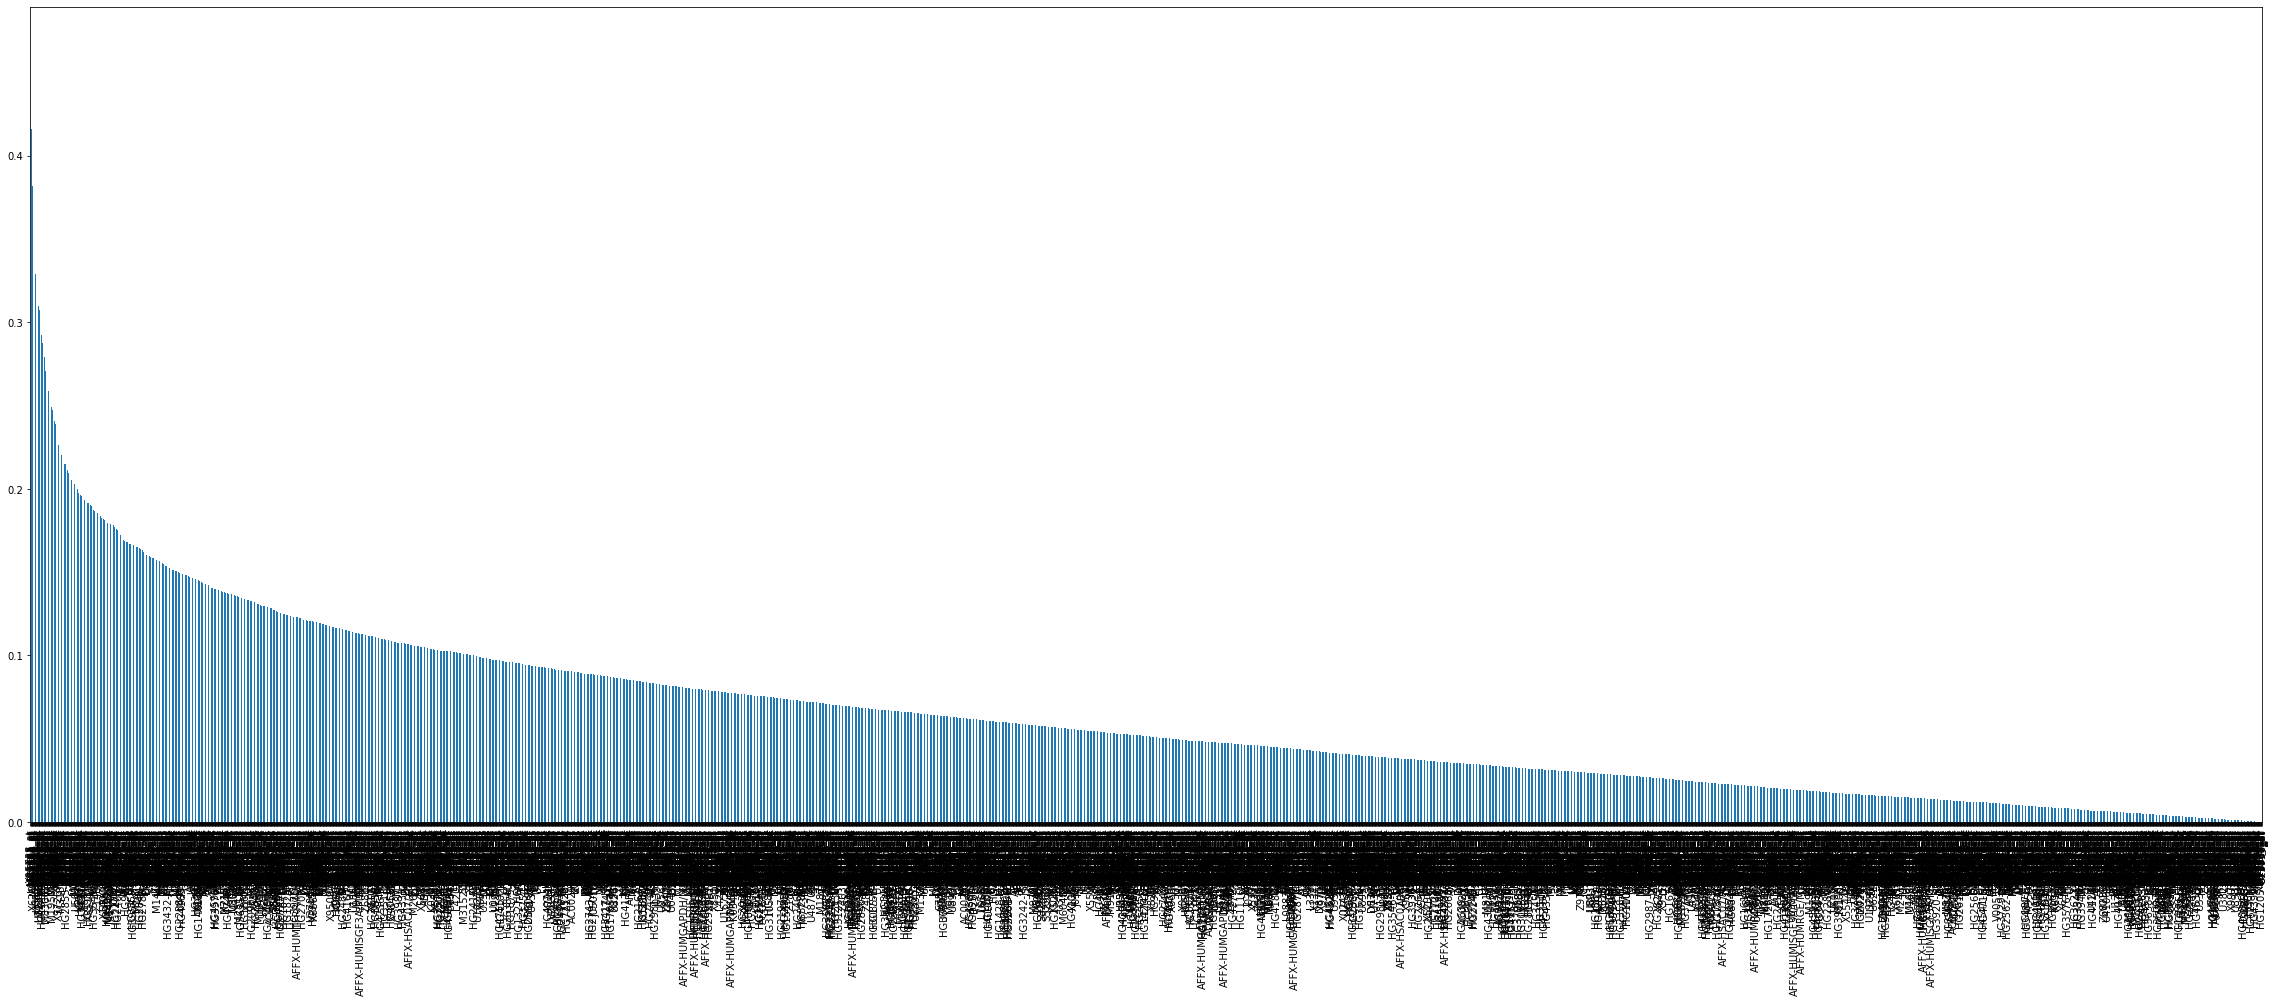

In [60]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=feature_name
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [61]:
required_indices = (-mutual_information).argsort()[:number_of_features_required_1]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required_1):
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  M23197_at
Selected Feature 2 is :  X95735_at
Selected Feature 3 is :  M27891_at
Selected Feature 4 is :  M31523_at
Selected Feature 5 is :  L09209_s_at
Selected Feature 6 is :  M84526_at
Selected Feature 7 is :  X62654_rna1_at
Selected Feature 8 is :  M83652_s_at
Selected Feature 9 is :  M93056_at
Selected Feature 10 is :  X62320_at
Selected Feature 11 is :  M92287_at
Selected Feature 12 is :  D88422_at
Selected Feature 13 is :  U46499_at
Selected Feature 14 is :  M14636_at
Selected Feature 15 is :  Z49194_at
Selected Feature 16 is :  U05259_rna1_at
Selected Feature 17 is :  M11722_at
Selected Feature 18 is :  J05243_at
Selected Feature 19 is :  M96326_rna1_at
Selected Feature 20 is :  X59417_at
Selected Feature 21 is :  U22376_cds2_s_at
Selected Feature 22 is :  U62293_rna1_s_at
Selected Feature 23 is :  M19507_at
Selected Feature 24 is :  M63379_at
Selected Feature 25 is :  M31642_at
Selected Feature 26 is :  HG1612-HT1612_at
Selected Feature 27 is :  M12959_

Selected Feature 519 is :  X55990_rna1_at
Selected Feature 520 is :  HG2846-HT2983_at
Selected Feature 521 is :  X74301_s_at
Selected Feature 522 is :  S67798_at
Selected Feature 523 is :  X69819_at
Selected Feature 524 is :  L41913_at
Selected Feature 525 is :  Z48042_at
Selected Feature 526 is :  U04847_at
Selected Feature 527 is :  D63881_at
Selected Feature 528 is :  X89960_at
Selected Feature 529 is :  M16707_rna1_s_at
Selected Feature 530 is :  U40369_rna1_at
Selected Feature 531 is :  J04810_s_at
Selected Feature 532 is :  U14550_at
Selected Feature 533 is :  U14588_at
Selected Feature 534 is :  U61849_at
Selected Feature 535 is :  U90902_at
Selected Feature 536 is :  U82319_at
Selected Feature 537 is :  M57731_s_at
Selected Feature 538 is :  HG831-HT831_at
Selected Feature 539 is :  U50062_at
Selected Feature 540 is :  U22897_at
Selected Feature 541 is :  M94633_at
Selected Feature 542 is :  X84195_at
Selected Feature 543 is :  U41635_at
Selected Feature 544 is :  D86479_at
Sel

Selected Feature 892 is :  U66581_at
Selected Feature 893 is :  X68242_at
Selected Feature 894 is :  U03886_at
Selected Feature 895 is :  M97856_at
Selected Feature 896 is :  U04285_s_at
Selected Feature 897 is :  L02547_at
Selected Feature 898 is :  U79258_at
Selected Feature 899 is :  D88795_at
Selected Feature 900 is :  U85193_at
Selected Feature 901 is :  M17183_s_at
Selected Feature 902 is :  X83492_s_at
Selected Feature 903 is :  D64154_at
Selected Feature 904 is :  X56253_rna1_at
Selected Feature 905 is :  X93499_at
Selected Feature 906 is :  X03066_at
Selected Feature 907 is :  X76538_at
Selected Feature 908 is :  M64934_at
Selected Feature 909 is :  Y12711_at
Selected Feature 910 is :  X52001_at
Selected Feature 911 is :  U94585_at
Selected Feature 912 is :  AB000381_s_at
Selected Feature 913 is :  Z69720_at
Selected Feature 914 is :  M99701_at
Selected Feature 915 is :  M74525_at
Selected Feature 916 is :  X17059_s_at
Selected Feature 917 is :  M81778_s_at
Selected Feature 91

Selected Feature 1303 is :  Y00339_s_at
Selected Feature 1304 is :  J05016_rna1_s_at
Selected Feature 1305 is :  U48730_at
Selected Feature 1306 is :  U44848_at
Selected Feature 1307 is :  U86529_at
Selected Feature 1308 is :  U09367_at
Selected Feature 1309 is :  M30894_at
Selected Feature 1310 is :  D78586_at
Selected Feature 1311 is :  M95167_at
Selected Feature 1312 is :  U67368_s_at
Selected Feature 1313 is :  U05227_at
Selected Feature 1314 is :  U65404_at
Selected Feature 1315 is :  K03430_at
Selected Feature 1316 is :  D86964_at
Selected Feature 1317 is :  X00695_s_at
Selected Feature 1318 is :  U03398_at
Selected Feature 1319 is :  L40380_at
Selected Feature 1320 is :  Y08765_s_at
Selected Feature 1321 is :  J05253_s_at
Selected Feature 1322 is :  U39573_at
Selected Feature 1323 is :  Z47553_at
Selected Feature 1324 is :  Z80776_at
Selected Feature 1325 is :  X58079_at
Selected Feature 1326 is :  J03909_at
Selected Feature 1327 is :  HG3417-HT3600_s_at
Selected Feature 1328 is

Selected Feature 1759 is :  Z50853_at
Selected Feature 1760 is :  U41740_at
Selected Feature 1761 is :  S67970_at
Selected Feature 1762 is :  M13829_s_at
Selected Feature 1763 is :  J02963_at
Selected Feature 1764 is :  U78575_at
Selected Feature 1765 is :  X89416_at
Selected Feature 1766 is :  S42303_at
Selected Feature 1767 is :  M55621_at
Selected Feature 1768 is :  Z22548_at
Selected Feature 1769 is :  D49490_at
Selected Feature 1770 is :  M27161_at
Selected Feature 1771 is :  HG2463-HT2559_at
Selected Feature 1772 is :  D38496_s_at
Selected Feature 1773 is :  M60974_s_at
Selected Feature 1774 is :  L09230_s_at
Selected Feature 1775 is :  U76638_at
Selected Feature 1776 is :  L43575_s_at
Selected Feature 1777 is :  U48263_at
Selected Feature 1778 is :  L11284_at
Selected Feature 1779 is :  HG3288-HT3465_at
Selected Feature 1780 is :  AB000584_at
Selected Feature 1781 is :  L15326_s_at
Selected Feature 1782 is :  U18242_at
Selected Feature 1783 is :  U11878_at
Selected Feature 1784 

Selected Feature 2189 is :  L20859_at
Selected Feature 2190 is :  X05232_at
Selected Feature 2191 is :  U69108_at
Selected Feature 2192 is :  L07493_at
Selected Feature 2193 is :  M19311_at
Selected Feature 2194 is :  U20499_at
Selected Feature 2195 is :  L76568_xpt3_f_at
Selected Feature 2196 is :  S73885_s_at
Selected Feature 2197 is :  U96629_rna2_at
Selected Feature 2198 is :  Y08999_at
Selected Feature 2199 is :  U30825_at
Selected Feature 2200 is :  D31890_at
Selected Feature 2201 is :  M36200_at
Selected Feature 2202 is :  U50361_s_at
Selected Feature 2203 is :  L78833_cds1_at
Selected Feature 2204 is :  D16105_at
Selected Feature 2205 is :  U62962_at
Selected Feature 2206 is :  U88871_at
Selected Feature 2207 is :  U06681_at
Selected Feature 2208 is :  X92896_at
Selected Feature 2209 is :  HG1103-HT1103_at
Selected Feature 2210 is :  HG4094-HT4364_s_at
Selected Feature 2211 is :  U24166_at
Selected Feature 2212 is :  D50922_at
Selected Feature 2213 is :  X93498_at
Selected Feat

Selected Feature 2818 is :  X59131_at
Selected Feature 2819 is :  L00058_at
Selected Feature 2820 is :  X57985_rna2_at
Selected Feature 2821 is :  M23294_at
Selected Feature 2822 is :  U51920_at
Selected Feature 2823 is :  L07548_at
Selected Feature 2824 is :  D67029_at
Selected Feature 2825 is :  Y09615_at
Selected Feature 2826 is :  U37143_at
Selected Feature 2827 is :  U58516_at
Selected Feature 2828 is :  M17254_s_at
Selected Feature 2829 is :  M34181_at
Selected Feature 2830 is :  M17886_at
Selected Feature 2831 is :  X99947_at
Selected Feature 2832 is :  S45630_at
Selected Feature 2833 is :  L42542_at
Selected Feature 2834 is :  L11566_at
Selected Feature 2835 is :  Z83821_cds2_at
Selected Feature 2836 is :  U14187_at
Selected Feature 2837 is :  L10284_at
Selected Feature 2838 is :  HG880-HT880_at
Selected Feature 2839 is :  X60592_at
Selected Feature 2840 is :  HG4557-HT4962_r_at
Selected Feature 2841 is :  J03827_at
Selected Feature 2842 is :  D84145_at
Selected Feature 2843 is

Selected Feature 3169 is :  X66945_at
Selected Feature 3170 is :  D13540_at
Selected Feature 3171 is :  U34976_at
Selected Feature 3172 is :  X67325_at
Selected Feature 3173 is :  U17894_at
Selected Feature 3174 is :  D25248_at
Selected Feature 3175 is :  X70940_s_at
Selected Feature 3176 is :  X96381_rna1_at
Selected Feature 3177 is :  U22398_at
Selected Feature 3178 is :  L04953_at
Selected Feature 3179 is :  M33308_at
Selected Feature 3180 is :  M95767_at
Selected Feature 3181 is :  U47050_at
Selected Feature 3182 is :  M60784_s_at
Selected Feature 3183 is :  X98178_s_at
Selected Feature 3184 is :  M57703_s_at
Selected Feature 3185 is :  U13045_at
Selected Feature 3186 is :  X57110_s_at
Selected Feature 3187 is :  S81419_at
Selected Feature 3188 is :  U51478_at
Selected Feature 3189 is :  HG3936-HT4206_at
Selected Feature 3190 is :  Z50781_at
Selected Feature 3191 is :  L05188_f_at
Selected Feature 3192 is :  X12433_at
Selected Feature 3193 is :  U24186_at
Selected Feature 3194 is :

In [62]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 3431
['M23197_at', 'X95735_at', 'M27891_at', 'M31523_at', 'L09209_s_at', 'M84526_at', 'X62654_rna1_at', 'M83652_s_at', 'M93056_at', 'X62320_at', 'M92287_at', 'D88422_at', 'U46499_at', 'M14636_at', 'Z49194_at', 'U05259_rna1_at', 'M11722_at', 'J05243_at', 'M96326_rna1_at', 'X59417_at', 'U22376_cds2_s_at', 'U62293_rna1_s_at', 'M19507_at', 'M63379_at', 'M31642_at', 'HG1612-HT1612_at', 'M12959_s_at', 'U51333_s_at', 'U03911_at', 'Y07604_at', 'X12447_at', 'M63138_at', 'M31211_s_at', 'M29696_at', 'L47738_at', 'M83667_rna1_s_at', 'X51521_at', 'M22960_at', 'Z15115_at', 'X52056_at', 'M63959_at', 'M19045_f_at', 'S82470_at', 'D88270_at', 'M33680_at', 'X76648_at', 'X17042_at', 'M15395_at', 'M19508_xpt3_s_at', 'M32304_s_at', 'L41870_at', 'S50223_at', 'U59878_at', 'M89957_at', 'X07743_at', 'M16038_at', 'M11147_at', 'D63880_at', 'J03077_s_at', 'X64072_s_at', 'Y00636_at', 'M95610_at', 'U90549_at', 'U30255_at', 'X97267_rna1_s_at', 'X16546_at', 'M13792_at', 'X80230_at', 'M331

In [63]:
X_train1 = X_train[required_features_mi]
X_train1.head()

,M23197_at,X95735_at,M27891_at,M31523_at,L09209_s_at,M84526_at,X62654_rna1_at,M83652_s_at,M93056_at,X62320_at,...,U39400_at,U91903_at,U34343_at,U93867_at,J03241_s_at,X83492_at,U29343_at,X96698_at,Z38026_at,HG3725-HT3981_s_at
55,-0.568187,-0.292338,-0.485698,-0.239347,-0.445515,-0.504275,-0.446297,-0.355519,-0.714044,-0.231683,...,-0.482209,-0.975484,-0.892937,-0.484530,0.374005,-0.462554,-0.239262,-0.243965,1.126577,-0.780840
70,3.933768,1.597794,0.000850,-0.676655,0.368293,0.289797,-0.213625,0.555272,3.970068,-0.410638,...,1.770637,-0.645155,-1.185954,1.727271,1.281097,0.393192,0.782578,1.693232,-0.171723,3.438160
62,0.466492,1.729116,1.235296,-0.874682,3.063641,0.763899,0.793523,0.846687,1.142686,0.048036,...,-0.947565,-0.383169,1.391832,0.554347,0.673806,-0.537157,-0.561364,-0.588620,-0.179888,0.428497
43,-0.059653,-1.041280,-0.479894,0.522111,-0.936714,-0.536529,-0.495626,-0.876796,-0.857626,-0.399353,...,1.809779,1.803839,0.355738,0.001396,0.643058,0.687217,0.016198,0.653326,-0.202752,-0.594788
4,-0.048646,-0.386960,-0.559493,0.351195,-0.222117,-0.399521,0.687464,-0.282425,0.429694,-0.205887,...,0.470249,-0.565420,0.621944,0.085177,-0.586898,-1.063769,1.026931,1.146539,0.133663,0.018088


# Selection of features using F Classification 

In [64]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  # Set of all the names of correlated columns
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # getting the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train1, 0.5)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :262.28027725219727 seconds


In [65]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 3057


In [66]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['D88613_at', 'U50078_at', 'D49738_at', 'U20657_at', 'U45285_at', 'U78107_at', 'D89016_at', 'L06133_at', 'D63879_at', 'S82447_s_at', 'X14787_at', 'M31659_at', 'M13150_s_at', 'U31501_at', 'M21551_rna1_at', 'M82882_at', 'X60299_s_at', 'X69111_at', 'M60331_at', 'HG2981-HT3938_s_at', 'U81787_at', 'X91911_s_at', 'M33336_at', 'U91985_at', 'U60115_at', 'U05340_at', 'X64838_at', 'K01911_at', 'L31860_at', 'X81817_at', 'M19309_s_at', 'U16720_rna1_s_at', 'M68520_at', 'U10685_at', 'M27543_at', 'M13452_s_at', 'X92972_at', 'X59834_at', 'U18937_at', 'S70348_at', 'L29008_at', 'X06614_at', 'X67951_at', 'X99687_at', 'M25322_at', 'X97748_s_at', 'D87455_at', 'D78134_at', 'X99586_s_at', 'D38550_at', 'D14695_at', 'X00088_at', 'M74525_at', 'U65579_at', 'U02493_at', 'D90359_at', 'D13633_at', 'Z22555_at', 'D55643_s_at', 'M90696_at', 'U05255_at', 'AB002559_at', 'U88902_cds1_f_at', 'X07315_at', 'U41766_s_at', 'M13143_at', 'U77129_at', 'D87459_at', 'D79984_s_at', 'S42457_a

In [67]:
required_features_fc = selected_features_fc[:number_of_features_required_2]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 1715


In [68]:
X_train2 = X_train[required_features_fc]
X_train2.head()

,D88613_at,U50078_at,D49738_at,U20657_at,U45285_at,U78107_at,D89016_at,L06133_at,D63879_at,S82447_s_at,...,AC000061_cds2_at,U33052_s_at,M19508_xpt3_s_at,L23852_at,X96381_rna1_at,D16626_at,M64347_at,M91670_at,X53683_at,M96739_at
55,-0.702224,-1.343979,-0.185884,-0.733986,-0.708106,0.656447,0.098594,0.527413,-0.488411,-0.090202,...,0.249277,-1.371464,-0.259219,-0.083445,0.697176,-0.198492,0.104638,-0.410105,-0.412542,-0.404553
70,2.196678,-0.181279,0.020018,3.551790,3.654587,-0.163105,0.151649,-2.586406,-0.439792,-0.035688,...,1.025661,3.329868,0.248802,5.623341,-1.289414,-2.815559,2.178709,-0.187679,-0.948652,-0.959110
62,-0.447554,0.744765,0.278332,0.818535,0.769803,0.396589,0.424883,-1.355706,3.074686,1.265200,...,-0.843413,-0.756228,1.699405,0.175955,0.966327,1.538633,0.115849,0.132804,1.879230,0.177150
43,1.004606,-1.189638,-0.541534,-0.488851,0.737997,0.066769,4.305864,-1.978470,-0.106403,-1.212683,...,2.439449,-0.616929,-0.198133,-1.949447,-0.270486,0.142864,2.044174,-0.888438,0.565554,3.233031
4,-0.566761,0.384637,1.566158,0.789936,-0.281908,-0.892706,-0.264833,0.186376,0.650668,0.370684,...,-0.244351,-0.518259,-0.475727,-0.108548,-1.238148,1.083491,0.631564,0.637446,-0.956837,-0.043897


# Feature Selection Using T-Test

In [69]:
import statistics

In [70]:
temp_index = ['gene'] + required_features_fc
new_df = df[temp_index]
new_df.shape

(72, 1716)

In [71]:
start_time_t = time.time()
x= new_df.values               #converting data-frame into numpy arrray

a,b = x.shape             #size(row,column) of 2-d array stored in two variables

n1 =0;
n2 = 0;

for i in range(a):        #calculating size of each class lable
    if x[i][0] == 1:
        n1=n1 + 1;
    else:
        n2=n2 + 1;


sample1 = []
sample2= []
tval=[]

#below is main loop for calculating t-value of each column

for j in range(1,b):      #for each column(feature)
    for i in range(a):

        if x[i][0]== 1:           #dividing feature values into two samples corresponding to class levels  1 and 2.
            sample1.append(x[i][j])
        else:
            sample2.append(x[i][j])



    sample1 = list(map(int,sample1))       #converting sample values from string to integar
    sample2 = list(map(int,sample2))


    s1bar = statistics.mean(sample1)          #calculating mean of each sample
    s2bar = statistics.mean(sample2)

    s1var = statistics.variance(sample1)      #calculating variance of each sample
    s2var = statistics.variance(sample2)



    t = abs(s1bar - s2bar)/np.sqrt(s1var/n1+s2var/n2)        #calculating t value by comparing mean and variance using given formula

    tval.append(t)       #appending t-value of each sample to a list

    sample1.clear()      #clearing sample list  as it will be reused for each column(feature)
    sample2.clear()



sort_index=[]

sort_index = sorted(range(len(tval)), key=lambda k: tval[k])   #sorting t-value in ascending order and storing corresponding index


new_index = [p+1 for p in sort_index]    #increasing sorted index by 1 since  we have to fetch it from dataframe for corresponding columns

new_index.reverse()     # it will sort the index in descending order

# Note: columns having more t- values are more important hence we will select less than 20% of features from starting of the calculated new_index list

required_features_t = new_index[:number_of_features_required_3]   #selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :1.2492702007293701 seconds


In [72]:
print(required_features_t)

[1335, 1301, 692, 702, 928, 1566, 305, 208, 774, 760, 541, 228, 1546, 1367, 648, 1296, 1646, 438, 1677, 1691, 436, 1325, 1361, 494, 560, 1485, 886, 1466, 330, 1047, 351, 750, 18, 1221, 43, 890, 1495, 132, 1675, 636, 1110, 1015, 1132, 574, 531, 1443, 207, 1633, 1355, 1297, 624, 955, 1020, 1468, 1692, 25, 994, 1446, 1350, 1452, 1118, 576, 1564, 1532, 764, 1562, 286, 699, 528, 303, 103, 1120, 1390, 1506, 77, 777, 459, 1678, 72, 1243, 1197, 527, 549, 741, 15, 159, 693, 1230, 854, 296, 1343, 1143, 1403, 1389, 853, 970, 725, 84, 141, 902, 62, 1426, 1475, 113, 1091, 201, 161, 706, 936, 1372, 28, 197, 1291, 312, 119, 1240, 780, 55, 761, 1079, 1573, 686, 682, 137, 1616, 1661, 1570, 358, 167, 42, 609, 1705, 412, 398, 1601, 1235, 581, 230, 690, 979, 1152, 1010, 1530, 1548, 1549, 314, 232, 901, 295, 112, 1122, 961, 1312, 1158, 174, 442, 1270, 190, 757, 449, 1416, 807, 1067, 443, 216, 169, 718, 1586, 827, 1019, 252, 751, 130, 1076, 68, 356, 1489, 36, 489, 1310, 615, 621, 1430, 244, 1035, 1618, 1351

In [73]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  977


In [74]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['M23161_at', 'M20530_at', 'HG3344-HT3521_at', 'HG3502-HT3696_at', 'L10284_at', 'M63582_at', 'D38583_at', 'D25218_at', 'J00123_at', 'HG620-HT620_at', 'D87023_cds2_at', 'D26579_at', 'M62424_at', 'M26683_at', 'HG2167-HT2237_at', 'M19722_at', 'M80563_at', 'D79205_at', 'M84739_at', 'M86752_at', 'D78586_at', 'M22632_at', 'M26061_at', 'D84276_at', 'D87435_at', 'M55040_at', 'L04656_at', 'M37033_at', 'D43951_at', 'L25851_at', 'D50402_at', 'HG4533-HT4938_at', 'AFFX-HUMTFRR/M11507_M_at', 'M10901_at', 'AB002315_at', 'L05424_cds2_at', 'M55542_at', 'D13630_at', 'M84605_at', 'HG1612-HT1612_at', 'L36922_at', 'L20814_at', 'L38933_rna1_at', 'D87451_at', 'D86975_at', 'M34079_at', 'D25217_at', 'M77016_at', 'M25322_at', 'M19961_at', 'D90359_at', 'L13329_at', 'L20861_at', 'M37190_at', 'M86808_at', 'AFFX-HSAC07/X00351_M_st', 'L19267_at', 'M34182_at', 'M24902_at', 'M34539_at', 'L37378_at', 'D87453_at', 'M63488_at', 'M60724_at', 'HG830-HT830_at', 'M63379_at', 'D38048_at', 'HG3492-HT3686

In [75]:
X_train3 = X_train.iloc[:,required_features_t]

In [76]:
X_train3.head()

,M23197_at,M20543_at,HG3355-HT3532_at,HG3514-HT3708_at,L10373_at,M63589_at,D42041_at,D25248_at,J00124_at,HG64-HT64_at,...,L34155_at,D31888_at,L14812_at,D14661_at,HG2992-HT5186_at,M25322_at,D63412_at,L09234_at,L29218_at,L42563_at
55,-0.568187,0.235977,-0.097340,-1.370447,-0.996626,-0.714699,-1.701233,0.570590,1.444339,0.531179,...,-0.269710,-0.906709,-0.107825,-1.115780,-0.333477,-0.439041,0.214203,0.202567,0.849285,-0.404396
70,3.933768,0.456480,2.179460,0.452639,-0.222738,-0.381193,1.010373,2.170154,-0.023401,0.460820,...,-0.047087,0.575692,0.463139,-0.214526,1.882698,-1.411013,-1.042980,-1.153605,5.036725,-0.083913
62,0.466492,-0.506770,-0.667537,0.174830,0.307486,-0.200772,-0.018076,0.523345,-0.657395,0.822664,...,0.837046,1.006067,0.130787,-0.972898,-0.943728,-1.551117,-0.989860,-0.392246,0.558903,-1.330237
43,-0.059653,-1.562863,3.362386,-0.402515,-0.529891,-0.397595,-0.712544,2.764085,0.871139,0.440718,...,0.627144,-0.710649,0.889232,-0.529599,1.408058,-0.728006,-0.193053,-1.510492,0.773390,3.239618
4,-0.048646,-0.065764,-1.002478,0.424703,-0.492140,-0.200772,0.740007,-0.414796,-0.987420,-0.906145,...,0.620783,0.025769,-1.726978,0.122528,0.473054,0.532930,0.267324,0.012227,0.875683,-0.434070


In [77]:
X_test3 = X_test.iloc[:,required_features_t]
X_test3.head()

,M23197_at,M20543_at,HG3355-HT3532_at,HG3514-HT3708_at,L10373_at,M63589_at,D42041_at,D25248_at,J00124_at,HG64-HT64_at,...,L34155_at,D31888_at,L14812_at,D14661_at,HG2992-HT5186_at,M25322_at,D63412_at,L09234_at,L29218_at,L42563_at
26,-0.733295,0.108317,1.681036,-1.182654,-0.106054,-0.670961,-0.190368,2.095913,2.399673,1.878042,...,2.160065,-0.256365,1.690287,-0.375726,1.140404,1.881431,2.480675,0.369114,-1.074496,1.838988
27,2.273878,-0.437137,0.579187,0.520409,-0.538471,-0.796709,0.875190,0.982292,-0.674765,-0.112099,...,-0.670432,-0.218110,0.429052,-0.599208,0.772826,1.732571,0.444392,-1.343945,0.149728,0.503640
48,-0.836763,-0.529981,-0.493421,-0.960201,-0.466401,-0.988065,-0.500492,-1.710645,-0.735559,-1.046862,...,0.277307,-0.552845,-0.695833,-0.456326,-0.144335,-0.447798,-0.139933,0.535661,-0.665321,-0.766423
22,-0.680460,0.352031,-0.452218,-1.420111,-0.248477,-0.649091,-0.932547,-0.246065,0.888509,1.435788,...,0.868850,-0.753687,-0.670268,-0.225517,1.019068,-1.279665,1.312025,-1.439115,-0.421136,-0.671465
30,-0.020027,0.003868,-0.436269,0.343998,-0.601960,1.412085,0.432533,-0.482288,1.261958,-1.720293,...,-1.255613,0.083153,1.519850,1.664918,-0.215709,0.357800,-0.777378,1.082888,-0.780814,-0.161066


In [78]:
X_test3.shape

(15, 977)

In [79]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1]
[1 2 1 1 2 1 1 2 2 2 1 2 2 1 2]


# KNN Classifier

In [80]:
temp_fscore=0
temp_cm = np.zeros([2,2])
sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
    f_score_knn = f1_score(y_test3, y_test_prediction)
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 86.6667
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 91.2281
Testing accuracy on selected features for 2 neighbors: 80.0000
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 92.9825
Testing accuracy on selected features for 3 neighbors: 86.6667
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 89.4737
Testing accuracy on selected features for 4 neighbors: 80.0000
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 91.2281
Testing accuracy on selected features for 5 neighbors: 80.0000
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 84.2105
Testing accuracy on selected features for 6 neighbors: 80.0000
KNN Classfier for 7 neighbors:
Training accuracy on

In [81]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[7 0]
 [2 6]]
Average Confusion matrix is : [[7.         0.        ]
 [3.89473684 4.10526316]]


Confusion Matrix of KNN Classifier:


<AxesSubplot:>

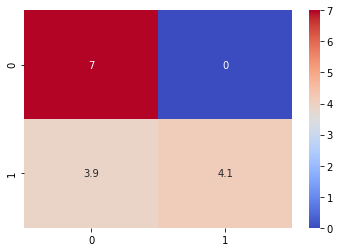

In [82]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [83]:
f_score_knn = f1_score(y_test3, max_y_test_prediction)

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.8750000000000001
Average F-Score is : 0.7881148950808393


# SVM(Support Vector Machine)

In [84]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 100.0000
Testing accuracy on selected features: 80.0000


In [85]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[7 0]
 [3 5]]


Confusion Matrix of SVM Classifier:


<AxesSubplot:>

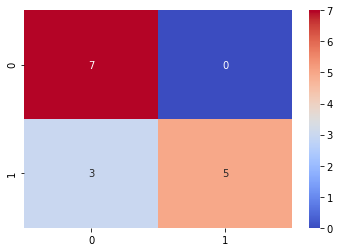

In [86]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [87]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc)

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.8235294117647058
